/var/folders/sy/d1chk6xs79b47_xrc635mlq40000gn/T/ipykernel_2946/2558567843.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


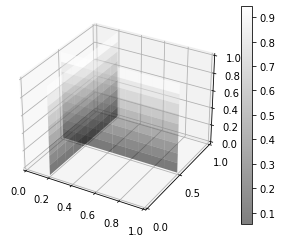

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import plotly.graph_objs as go

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_zticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cmap = plt.cm.gray

#plot vertical surface
y = 0.5
xx, zz = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
p = ax.plot_surface(xx, y, zz, cmap=cmap, alpha=0.5)

x = 0.2
yy, zz = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
p = ax.plot_surface(x, yy, zz, cmap=cmap, alpha=0.5)

fig.colorbar(p)
plt.show()

In [5]:
import numpy as np

# data
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.linspace(0, 1, 10)
X, Z = np.meshgrid(x, z)
Y, Z = np.meshgrid(y, z)

# intersection points
x_intersect = 0.2
y_intersect = 0.5


fig = go.Figure()


fig.add_trace(go.Surface(x=x_intersect * np.ones_like(Y), y=Y, z=Z, colorscale='Greys', showscale=False))


fig.add_trace(go.Surface(x=X, y=y_intersect * np.ones_like(X), z=Z, colorscale='Greys', showscale=False))


fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
                             xaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1]),
                             yaxis=dict(tickvals=[0, 0.5, 1]),
                             zaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])))


fig.show()


In [6]:
# data
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.linspace(0, 1, 10)
X, Z = np.meshgrid(x, z)
Y, Z = np.meshgrid(y, z)

# intersection points 
x_intersect = 0.2
y_intersect = 0.5

fig = go.Figure()

fig.add_trace(go.Surface(x=x_intersect * np.ones_like(Y), y=Y, z=Z, colorscale='Jet', showscale=False))

fig.add_trace(go.Surface(x=X, y=y_intersect * np.ones_like(X), z=Z, colorscale='Jet', showscale=False))


fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
                             xaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1]),
                             yaxis=dict(tickvals=[0, 0.5, 1]),
                             zaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])))


fig.show()


In [27]:
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.linspace(0, 1, 10)
X, Z = np.meshgrid(x, z)
Y, Z = np.meshgrid(y, z)

x_intersect = 0.2
y_intersect = 0.5


color_data = np.random.rand(10, 10)
fig = go.Figure()


fig.add_trace(go.Surface(x=x_intersect * np.ones_like(Y), y=Y, z=Z, 
                         surfacecolor=color_data, colorscale='Jet',
                         opacity=0.7, showscale=False))


fig.add_trace(go.Surface(x=X, y=y_intersect * np.ones_like(X), z=Z, 
                         surfacecolor=color_data, colorscale='Jet',
                         opacity=0.7, showscale=False))


fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
                             xaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1]),
                             yaxis=dict(tickvals=[0, 0.5, 1]),
                             zaxis=dict(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])),
                  updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                            method='animate', args=[None, {'frame': {'duration': 500, 'redraw': True},
                                            'fromcurrent': True, 'transition': {'duration': 0}}])])])

# Add frames animation
frames = []
for t in range(1, 101):
    color_data += np.random.uniform(-0.4, 0.4, (10, 10))
    color_data = np.clip(color_data, 0, 1)  # Ensure values are within [0, 1] range
    
    frame = go.Frame(data=[go.Surface(x=x_intersect * np.ones_like(Y), y=Y, z=Z, 
                                      surfacecolor=color_data, colorscale='Jet',
                                      opacity=0.7, showscale=False),
                            go.Surface(x=X, y=y_intersect * np.ones_like(X), z=Z, 
                                       surfacecolor=color_data, colorscale='Jet',
                                       opacity=0.7, showscale=False)])
    frames.append(frame)

fig.frames = frames

# Show the plot
fig.show()


In [15]:
fig = go.Figure(data=[
    go.Mesh3d(
        # cube vertices
        x=[0, 0, 1, 1, 0, 0, 1, 1],
        y=[0, 1, 1, 0, 0, 1, 1, 0],
        z=[0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5],
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 8, endpoint=True),
        # i, j and k give the vertices of triangles
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        name='y',
        showscale=True
    )
])

fig.show()